# Hypothesis Testing

Design of experiments is a cornerstone of the practice of statistical, with applications in virtually all areas of research. The goal is to design an experiment in order to confirm or reject a hypothesis.

### A/B testing
Is an experiment with two groups to establish which of two *treatments*, products, procedures, or the like is superior. Often one of the two tretments is the *standard existing treatment* (control), or no treatment. A tipycal hypothesis is that a *new treatment is better than the control*.

You know that any difference between the treatment groups is due to one two things:
* The effect of the different treatments
* Luck of the draw in which subject are assigned to which treatments.

Note: Why have a control group? Why just A/B? Why not C,D,...?

### Hypothesis test
Hypothesis tests (significance test): Their purpose is to help you learn whether *random chance* might be responsible for an observed effect and is futher analysis of an A/B test, or any randomized experiment. Statistical hypothesis testing was invented as a way to protect researchs from being fooled by random chance.

* **Null hypothesis**: Any difference between the groups is due chance.

Oru hope, is that we can in fact prove the null hypothesis is wrong and show that the output comes for groups A and B are *more different than what chance might produce*.

**Proof by contradiction:** If the null hypothesis is true, then A and B are similar. Therefore, when we apply *resampling methods* to the joint groups A and B and form two groups similar to A and B, there should not be a significant difference between them. Otherwise, the null hypothesis is incorrect. The question then arises: *how big must the difference be?*

### Resampling
*Resampling* in statistics means to repeatedly sample values from observed data, with a general goal of assessing random variability in a statistic. The are two main types:
* **bootstrap test**: used to assess the reliability of an estimate. 
* **permutation test**: used to test hypotheses. The procedure is: combine the result -> randonmly draw(without replacement) to collect one set of resamlpes that mirror the sizes of the original samples -> calculated the *statistic or estimate* on it -> record (one permutation) -> build the distribution of the test statistic.

There are two variants of the poermutation test: *exhaustive permutation test* (exact test) which instead of just randomly shuffing and dividing the data, we actually figure aout all the possible ways it could be divided; *bootstrap èrmutation test* which used replacement instead of without replacement.

### Statistical significance
*Statistical significance* is how statisticians masure whether an experiment (or even a study of existing data) yield a result more extreme than what change might produce. If the result is beyod the realm of change variation, it is said to be statistically significant.

Simply looking at the graph is not very precise way to measure statistical significance, so of more interest is the *p-value*.
* **p-value**: The p-value, or probability value, is a measure used in statistics to assess the evidence against a null hypothesis. This is the frequency with which the change model produce a result more extreme than the observed result. It represents the probability of observing the data or more extreme results if the null *hypothesis is true*.

1. A small p-value (typically less than 0.05) suggests that the observed data is unlikely to have occurred if the null hypothesis is true. In such cases, researchers may reject the null hypothesis in favor of the alternative hypothesis.
2. A large p-value (greater than 0.05) indicates that the observed data is not very unusual under the assumption of the null hypothesis. In this case, researchers may not have enough evidence to reject the null hypothesis.

### t-test
### Multiple testing
### Degree of Freedom
### ANOVA
### Chi-Square test

## Data for examples

In [163]:
getwd()

[1] "/home/angel/Documents/galois1915/Statistical-experiments-and-Significance-testing"

In [164]:
data <- read.csv("data/UShealthInsurance/insurance.csv")

* **mbi** Body mass index, providing an understanding of body, weights that are relatively high or low relative to
* **sex** Insurance contractor gender, female / male
* **charges** Individual medical costs billed by health insurance.

In [165]:
head(data,n=3)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.90,0,yes,southwest,16884.924
2,18,male,33.77,1,no,southeast,1725.552
3,28,male,33.00,3,no,southeast,4449.462


In [187]:
# funtion to permutations
perm_func <- function(nA,nB)
    {
    n <- nA+nB
    idx_a <- sample(1:n, nA)
    idx_b <- setdiff(1:n, idx_a)
    #mean_diff <- mean(x[idx_b])-mean(x[idx_a])
    return (list(a=idx_a, b=idx_b))
    }

In [167]:
library(ggplot2)

## Example: Are the bmi in smokers higher than in non-smokers?

* **Null hypothesis**: there aren't difference between them. Their means are similar.

In [188]:
column <- "bmi"

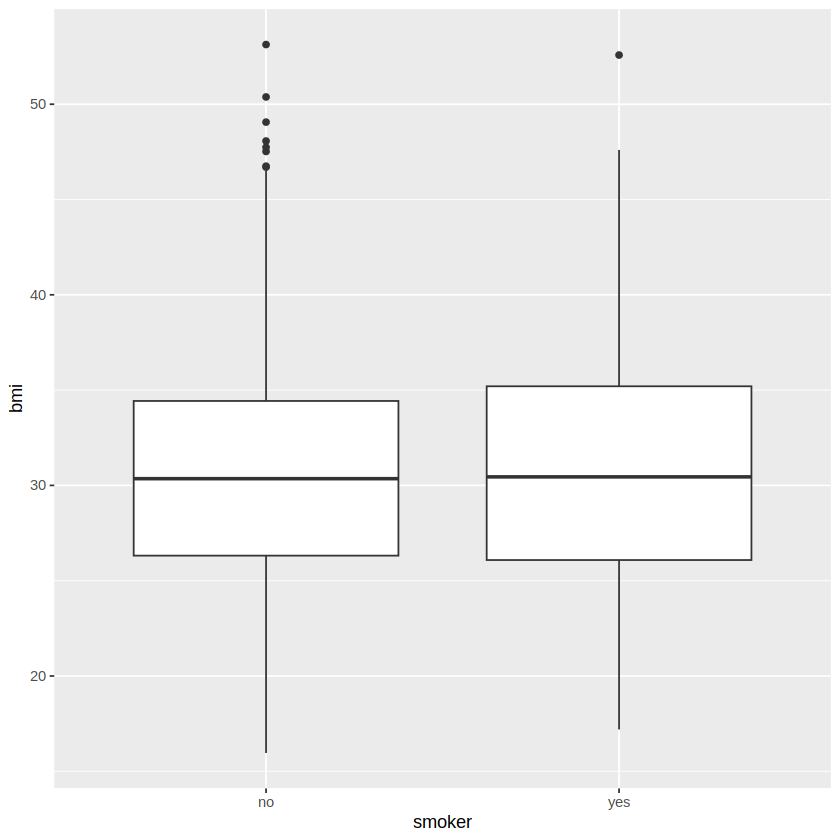

In [189]:
ggplot(data, aes(x=smoker, y=bmi)) + geom_boxplot()

In [190]:
mean_a = mean(data[data["smoker"]=="yes",column])
print(mean_a)
mean_b = mean(data[data["smoker"]=="no",column])
print(mean_b)
table(data$smoker)

[1] 30.70845
[1] 30.6518



  no  yes 
1064  274 

In [193]:
estimate <- rep(0,1000)
for (i in 1:1000){
    index <- perm_func(1064, 274)
    estimate[i] <- mean(data[index$a,column]) - mean(data[index$b,column])
}

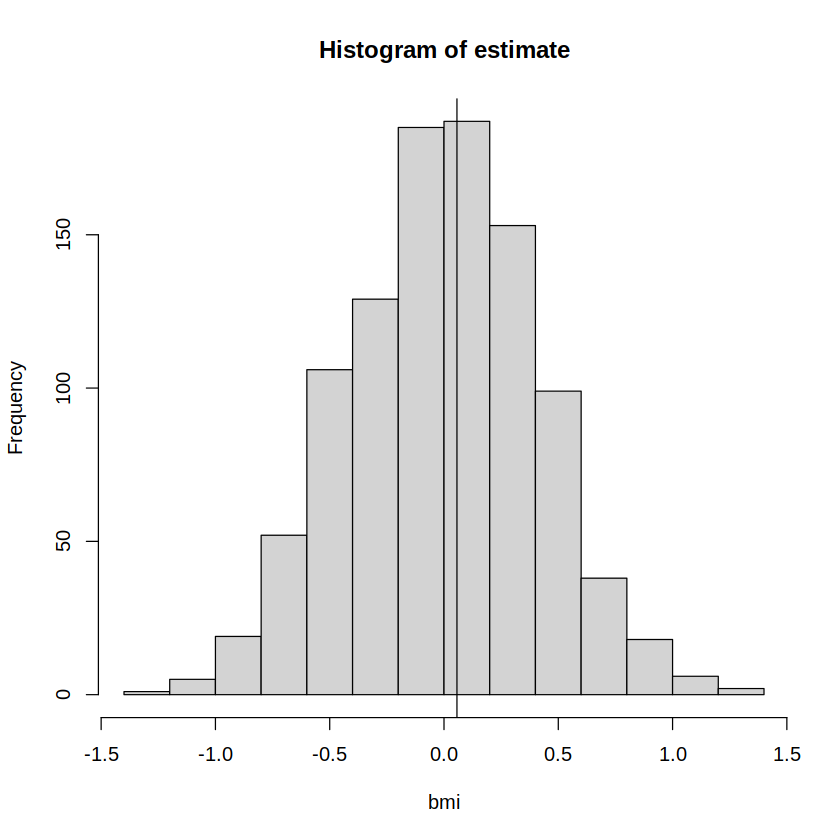

In [194]:
hist(estimate, xlab=column)
abline(v=mean_a-mean_b)

In [195]:
p_value <- mean( estimate > (mean_a-mean_b) )

In [196]:
p_value

[1] 0.471

We would expect to achieve a result as extreme as this, or more extreme result, by random chance over $\%40$ of the time. The observed data is not very unusual under the assumption of the null hypothesis

## Example: Are men more likely to smoke?

* **Null Hypothesis**: rate of male in each group is the same.

In [183]:
table(data[data$smoker=="yes","sex"]) # rate of male in smoker


female   male 
   115    159 

In [199]:
mean_s <- 159/(115+159)
mean_s

[1] 0.580292

In [184]:
table(data[data$smoker=="no","sex"]) # rate of male in no smoker


female   male 
   547    517 

In [200]:
mean_n <- 517/(517+547)
mean_n

[1] 0.4859023

In [197]:
estimate <- rep(0,1000)
for (i in 1:1000){
    index <- perm_func(115+159, 547+517) # smoker, no smoker
    estimate[i] <- mean(data[index$a,"sex"]=="male") - mean(data[index$b,"sex"]=="male")
}

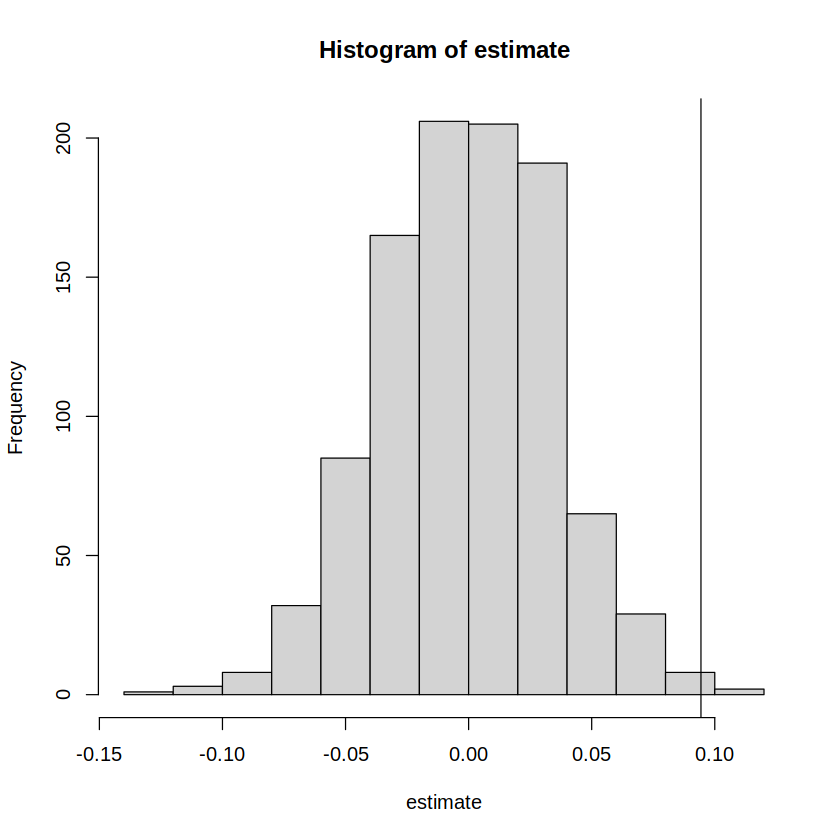

In [201]:
hist(estimate)
abline(v=mean_s-mean_n)

In [202]:
p_value <- mean( estimate > (mean_s-mean_n))
p_value

[1] 0.002

"If we assume that there is no difference between them, the observed data is unusual; we would observe that the difference in the proportion of men in both smokers and non-smokers groups, respectively, is equal to or greater than the observed difference in means only 0.2% of the time."

You might have evidence to reject the null hypothesis.

Since we have a binomial distribution, we can approximate the p-value with:

In [203]:
prop.test( x=c(159,517), n=c(115+159, 517+547) )


	2-sample test for equality of proportions with continuity correction

data:  c(159, 517) out of c(115 + 159, 517 + 547)
X-squared = 7.3929, df = 1, p-value = 0.006548
alternative hypothesis: two.sided
95 percent confidence interval:
 0.02639507 0.16238437
sample estimates:
   prop 1    prop 2 
0.5802920 0.4859023 


is close value to p-value obteined from the permutation test.

**Note**: Is possible use the <code>pro.test</code> function in the first example?